In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder



In [2]:
data = pd.read_csv('Mall_Customers_Data.csv')

In [3]:
data.head()

,CustomerID,Name,Gender,Age,Annual Income (k$),Spending Score (1-100),Address,Occupation,City
0,1,Luis Jackson,Male,19,15,39,"7294 Scott Harbor Apt. 602\nNorth Tammytown, W...","Teacher, music",Brandonshire
1,2,Nicole Cruz,Male,21,15,81,"67557 Moody Roads\nLake Johnshire, PW 59047",Product manager,Ariasstad
2,3,Linda Brooks,Female,20,16,6,"090 Hancock Highway\nSouth Patriciaview, DC 65170",Sub,North Shaneville
3,4,Steven Morgan,Female,23,16,77,"6532 Amanda Mission Apt. 406\nHollyburgh, RI 9...",Administrator,Lake Rebecca
4,5,Kelly Evans,Female,31,17,40,"27141 Lawrence Plains\nGaryfurt, WV 94124",Occupational therapist,Adamsborough


In [4]:
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])

In [5]:
data['Age'].describe()

count    5200.000000
mean       43.758269
std        15.222913
min        18.000000
25%        31.000000
50%        44.000000
75%        57.000000
max        70.000000
Name: Age, dtype: float64

In [6]:
corr = data.corr()
print(corr['Spending Score (1-100)'].sort_values(ascending=False))

Spending Score (1-100)    1.000000
Gender                    0.020395
CustomerID                0.017582
Annual Income (k$)        0.008992
Age                      -0.019664
Name: Spending Score (1-100), dtype: float64


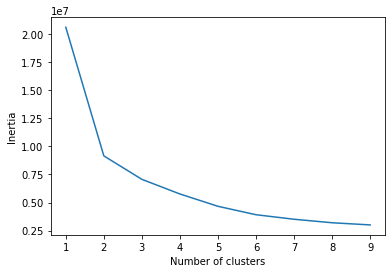

In [7]:
Temp=data[['Gender','Age','Annual Income (k$)','Spending Score (1-100)']].values
wcss = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(Temp)
    wcss.append(km.inertia_)
plt.plot(range(1, 10), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [13]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(Temp)
data['Cluster'] = kmeans.labels_

In [14]:
ai=data['Annual Income (k$)'].mean()
print(ai)

105.17423076923077


In [15]:
asp=data['Spending Score (1-100)'].mean()
print(asp)

49.84423076923077


In [16]:
cc = data['Cluster'].value_counts()
ccp = cc[1] / len(data) * 100
print(ccp)


31.80769230769231


In [17]:
c2d = data[data['Cluster'] == 2]
ac = c2d['Age'].value_counts()
mf = ac.index[0]
print(mf)

49


In [18]:
c3d = data[data['Cluster'] == 3]
ai = c3d['Annual Income (k$)'].mean()
print(ai)

nan


In [19]:
print(data['Cluster'].value_counts)

<bound method IndexOpsMixin.value_counts of 0       2
1       2
2       2
3       2
4       2
       ..
5195    0
5196    0
5197    0
5198    0
5199    0
Name: Cluster, Length: 5200, dtype: int32>


In [20]:
print( data[data['Cluster'] == 0])
print( data[data['Cluster'] == 1])
print( data[data['Cluster'] == 2])
print( data[data['Cluster'] == 3])

      CustomerID              Name  Gender  Age  Annual Income (k$)  \
144          145        Laura Reed       1   25                  77   
146          147       Sean Valdez       1   48                  77   
148          149     Jeffrey Stone       0   34                  78   
149          150        Lori Yoder       1   34                  78   
150          151  Teresa Mcpherson       1   43                  78   
...          ...               ...     ...  ...                 ...   
5195        5196      David Garcia       0   64                 119   
5196        5197     Ryan Thompson       1   47                 122   
5197        5198    Alejandro Haas       0   34                  99   
5198        5199   Kelly Maldonado       1   54                  97   
5199        5200        Cody Kelly       1   59                 106   

      Spending Score (1-100)  \
144                       12   
146                       36   
148                       22   
149                